# 1. Tuliskan script untuk import pandas library dan library untuk klasifikasi menggunakan Decision

In [130]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# 2. Sebutkan setidaknya 2 library untuk fungsi visualisasi di python.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Import loan_data.csv. 
Identifikasi tipe data dari masing-masing variable. Tampilkan 5 baris pertama dan tampilkan informasi summary statistics-nya.



#### Load Data dan Menampilkan 5 baris pertama

In [4]:
data = pd.read_csv("loan_data.csv")
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [69]:
data.shape

(9578, 14)

> Pada data tersebut memiliki 9578 baris dan 14 kolom

#### Identifikasi tipe data dari masing-masing variable

In [5]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

#### Informasi summary statistics

In [6]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# 4. Lakukan pengecekan missing data dan duplicated-row. 
Jika ada, sebutkan kolom apa yang ada missing data. Apakah ada duplicated-row?

 

#### Check missing value

In [27]:
print(f"Sum of null values in each feature:\n")
print(f"{data.isnull().sum()}")

Sum of null values in each feature:

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


> Tidak ada missing value pada data tersebut

#### Check duplicated row

In [10]:
data[data.duplicated()]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


> Tidak ada duplicated-row pada data tersebut

# 5. Lakukan pengecekan variabel target.
Ada berapa kategori pada variable target?<br>
Berapa proporsinya?<br>
Lakukan visualisasi yang menunjukkan PROPORSI kelas target.

> Saya menggunakan variabel 'not.fully.paid' sebagai variabel target, dengan mendifinisikannya sebagai berikut :<br>
    0 : peminjam yang akan membayar penuh (fully paid) <br>
    1 : peminjam yang kemungkinan tidak akan membayar penuh (not fully paid)

#### Check proporsion of 'target' ('not.fully.paid')

In [19]:
data['not.fully.paid'].unique()

array([0, 1], dtype=int64)

> Terdapat dua kategori pada variable target, yaitu 1 dan 0 

In [20]:
data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

> Proporsi kategori tersebut yaitu 7710 untuk kategori 1 dan 1868 untuk kategori 0

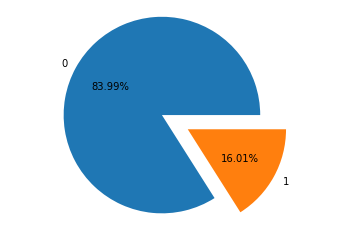

In [85]:
explode = (0.2, 0.1)
label = {'0', '1'}
plt.pie(data['not.fully.paid'].value_counts(),labels=label, autopct='%2.2f%%', explode=explode)
plt.axis('equal')
plt.show()

> Dari visualisasi proporsi kelas target dapat diketahui bahwa pada data tersebut target 0 (fully paid) lebih banyak dibandingkan target 1 (not fully paid) dengan proporsi 19%.

# 6. Berapa variansi (ragam) nilai installment?

In [47]:
data['installment'].var()

42878.52390484531

# 7. Berapa nilai simpangan kuartil pada variable ‘installment’?

In [46]:
print('Simpangan Kuartil :',iqr(data['installment']))

Simpangan Kuartil : 268.99249999999995


# 8. Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)?

In [75]:
data.groupby('purpose')['installment'].max()

purpose
all_other             916.95
credit_card           922.42
debt_consolidation    940.14
educational           861.88
home_improvement      902.06
major_purchase        898.55
small_business        926.83
Name: installment, dtype: float64

> Dari hasil diatas dapat diketahui bahwa nilai installment tertinggi dari variable 'purpose' yaitu pada kategori debt_consolidation

## 9. Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman.
Ada berapa kategori pada variable tersebut?<br>
Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

In [56]:
data['purpose'].nunique()

7

> Terdapat 7 kategori pada varible 'purpose', yaitu : 

In [49]:
data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

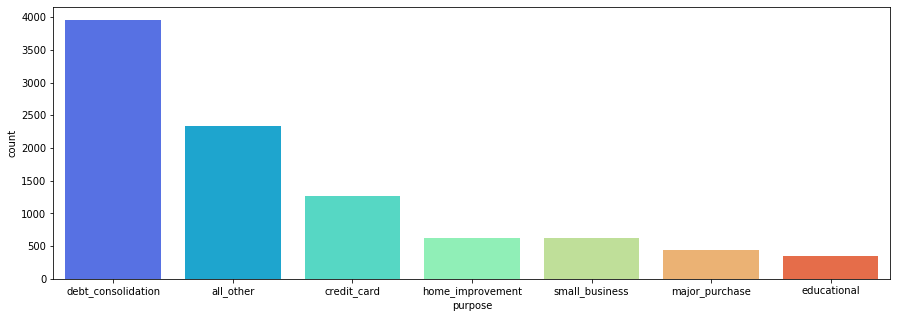

In [80]:
plt.figure(figsize=(15,5))
sns.countplot(data['purpose'], order = data['purpose'].value_counts().index, palette='rainbow')

> Dari visualisasi diatas dapat diketahui bahwa tujuan peminjam paling banyak adalah untuk debt_consolidation dan yang paling seidkit adalah untuk pendidikan

## 10. Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. 
Hint: Visualisasikan distribusi ‘fico’ terhadap target.

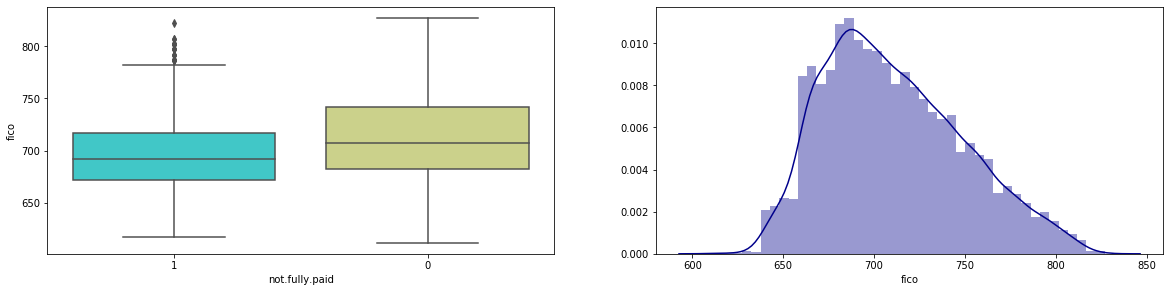

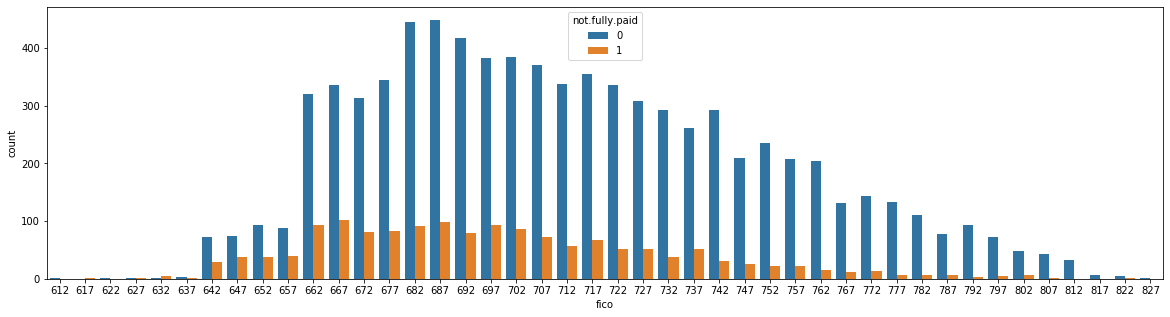

In [99]:
f=plt.figure(figsize=(20,10))
f.add_subplot(2,2,1)
b = data['not.fully.paid']
a = data[['not.fully.paid','fico']].groupby('not.fully.paid').mean().sort_values('fico')
sns.boxplot(x=data['not.fully.paid'], y=data['fico'],order=a.index, palette='rainbow')
f.add_subplot(2,2,2)
sns.distplot(data['fico'], kde = True, color = 'darkblue')
f=plt.figure(figsize=(20,5))
sns.countplot(data['fico'], hue = b)

> FICO digunakan untuk menilai pelamar, mengelola akun, dan menentukan tarif dan ketentuan. Dari visualisasi diatas dapat diketahui bahwa peminjam dengan nilai fico antara 662 sampai 742 merupakan peminjam dengan nilai yang baik, karena sehingga banyak peminjam dengan target 0 (fully paid) memiliki nilai fico tersebut. Menurut saya, FICO merupakan predictor yang cukup baik untuk memprediksi target. Akan tetapi pada beberapa pemberi pinjaman, bahkan jika peminjam memiliki skor FICO yang sangat baik, aplikasi peminjam dapat ditolak karena peminjam melakukan pembayaran lewat jatuh tempo dengan peminjam lain. Maka dari itu FICO dapat dijadikan sebagai acuan credit scoring, akan tetapi kita juga harus mengecek beberapa fitur lagi untuk memastikan prediksi tersebut benar.

## 11.Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda.
Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.

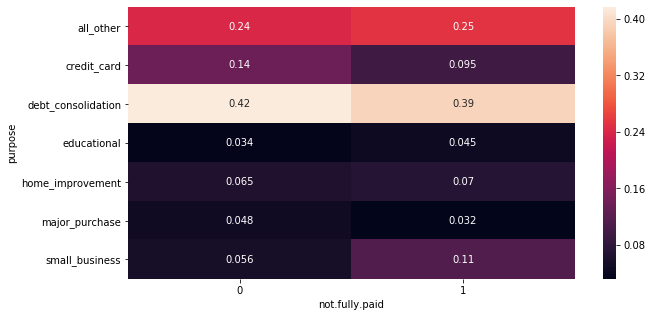

In [110]:
vispur = pd.crosstab(data['purpose'], data['not.fully.paid'], normalize = 'columns')
plt.figure(figsize=(10,5))
sns.heatmap(vispur, annot = True)

> Dari visualisasi diatas dapat diketahui bahwa pada target 0 banyak peminjam yang menggunakannya untuk debt_consolidation dan paling sedikit digunakan untuk educational. Sedangkan pada target 1 banyak peminjam yang juga menggunakannya untuk debt_consolidation dan paling sedikit digunakan untuk credit card. Menurut saya, variabel 'purpose' tidak bisa digunakan untuk menjadi predictor untuk memprediksi target, karena setiap peminjam memiliki tujuannya masing-masing dan berbeda-beda.

## 12. Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [113]:
avgint = data[data['purpose']=='credit_card']['int.rate'].mean()
print('Nilai rata-rata dari int.rate untuk purpose dengan kategori credit_card yaitu, ',round(r,4))

Nilai rata-rata dari int.rate untuk purpose dengan kategori credit_card yaitu,  0.1197


## 13. Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?

In [117]:
jmledu = len(data[(data['installment']>200) & (data['purpose']=='educational')])
print('Jumlah Kasus Pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan yaitu',jmledu)

Jumlah Kasus Pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan yaitu 137


## 14. Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.

In [121]:
loans3 = data.copy()[data['purpose']=='credit_card']
loans3.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


## 15. Siapkan data untuk pemodelan.
Ubah data kategorik menjadi dummy variabel.<br>
Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

In [123]:
final_data = pd.get_dummies(data)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [124]:
final_data.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_all_other               uint8
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
purpose_small_business          uint8
dtype: object

> Hasil diatas adalah variabel dari data yang telah diubah data kategoriknya menjadi dummy variabel beserta tipe data untuk masing-masing variabel

## 16. Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.

In [128]:
X = final_data.drop(['not.fully.paid'],axis=1)
Y = final_data['not.fully.paid']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.30, random_state=101) 

## 17. Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.

In [129]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
Y_pred = dtree.predict(X_test)

## 18. Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions

In [131]:
predictions = dtree.predict(X_test)

## 19. Tampilkan confusion matrix antara hasil prediksi dan target data test.

In [141]:
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix : \n', cm)

Confusion Matrix : 
 [[1987  427]
 [ 358  102]]


## 20. Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity

In [143]:
ukuran=sum(sum(cm))

accuracy=(cm[0,0]+cm[1,1])/ukuran
print ('Accuracy : ', accuracy)

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Accuracy :  0.7268615170494085
Sensitivity :  0.8231151615575808
Specificity :  0.2217391304347826


In [144]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2414
           1       0.19      0.22      0.21       460

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874



> Dari hasil diatas dapat diketahui ukuran kebaikan dari model yang telah digunakan. Dapat dilihat bahwa akurasi yang dihasilkan maish kurang baik untuk data diatas, akan lebih baik lagi apabila dicoba menggunakan model lain. Akan tetapi dapat kita ketahui pula bahwa ternyata sensitivity-nya sudah cukup baik yaitu 0.82 sehingga dapat dikatakan bahwa model tersebut sudah baik apabila memprediksi hasil positif yang benar dari semua yang prediksi positif.

# Compare with Another Model

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
all_model = [LogisticRegression,
             KNeighborsClassifier,
            RandomForestClassifier,
            GradientBoostingClassifier]

desc_model = ['LogisticRegression',
             'KNeighborsClassifier',
            'RandomForestClassifier',
            'GradientBoostingClassifier']


all_model

[sklearn.linear_model.logistic.LogisticRegression,
 sklearn.neighbors.classification.KNeighborsClassifier,
 sklearn.ensemble.forest.RandomForestClassifier,
 sklearn.ensemble.gradient_boosting.GradientBoostingClassifier]

In [146]:
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for i in all_model:
    model = i()
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    datatr.append(model.score( X_train,Y_train ))
    datasc.append(model.score( X_test , Y_test ))
    Recall.append(recall_score(Y_test,Y_pred))
    Precision.append(precision_score(Y_test,Y_pred))
    auc.append(roc_auc_score(Y_test,Y_pred))

In [147]:
data1 = pd.DataFrame()
data1['model'] = desc_model
data1['Accuracy training'] = datatr
data1['Accuracy test'] = datasc
data1['Precision'] = Precision
data1['Recall']= Recall
data1['AUC']=auc
data1['gap'] = abs(data1['Accuracy training'] - data1['Accuracy test'])
data1.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
0,LogisticRegression,0.838753,0.839944,0.192817,0.221739,0.522427,0.001191
3,GradientBoostingClassifier,0.854415,0.838553,0.192817,0.221739,0.522427,0.015863
2,RandomForestClassifier,0.978520,0.830898,0.192817,0.221739,0.522427,0.147623
1,KNeighborsClassifier,0.850984,0.810369,0.192817,0.221739,0.522427,0.040616


> Setelah dibandingkan dengan model lain dapat dilihat bahwa akurasi dari Logistic Regression merupakan yang paling baik dengan gap antara akurasi data training dan data testing yang kecil. Akan tetapi jika dilihat hasil precisionnya cukup rendah untuk data yang memprediksi hasil positif yang benar dari semua yang prediksi positif. Dapat diketahui bahwa hasil recall dari model tersebut memiliki nilai yang sama dengan model DecisionTreeClassifier. Menurut saya akan lebih baik jika menggunakan Logistic Regression yang memiliki akurasi tinggi karena kita ingin memprediksi peluang yang benar dari semua kejadian yang ada.